- 형태소 분석, 품사 태깅
- 명사단어 추출 : Okt품사 태깅패키지로 명사 추출
- 단어빈도 Counter()
- 단어 히스토그램

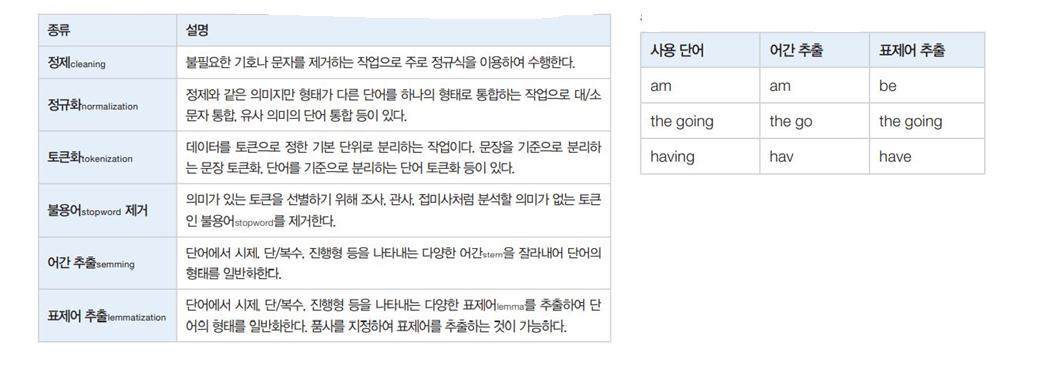

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install wordcloud

In [4]:
import pandas as pd
import re         # 정규식
from functools import reduce    # 2차원 리스트를 1차원리스트로 차원을 줄이는 역활
from nltk.tokenize import word_tokenize  # 자연어 처리 패키지 단어 토큰화작업
from nltk.corpus import stopwords        # 자연어 처리 패키지 불용엉 정보를 제공
from nltk.stem import WordNetLemmatizer # 자연어 처리 패키지 단어형태의 일반화를 위해 표제어 추출을 제공하는 모듈
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud

In [9]:
df1 = pd.read_excel('/content/myCabinetExcelData (1).xls')
df2 = pd.read_excel('/content/myCabinetExcelData.xls')
all_files_data_concat = pd.concat([df1,df2])
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Exploiting Reused-Based Sharing Work Opportuni...,"Sahal, Radhya; Khafagy, Mohammed H.; Omara, Fa...",Mary Ann Leibert,2021
1,NaN,2,SecDedoop: Secure Deduplication with Access Co...,"Ramya, P.; Sundar, C.",Mary Ann Leibert,2020
2,NaN,3,Earth observation and geospatial big data mana...,"Mihály, Szabolcs; Remetey-Fülöpp, Gábor; Krist...",John Wiley & Sons Ltd,2021
3,NaN,4,Big Data in Healthcare: Opportunities and Chal...,unknown,Mary Ann Leibert,2015
4,NaN,5,A comparison on scalability for batch big data...,"García-Gil, Diego; Ramírez-Gallego, Sergio; Ga...",Springer Nature,2017
...,...,...,...,...,...,...
95,NaN,96,Comparative study of big data of global adakit...,"Xuelong, Liu; Wenchang, Li; Qi, Zhang; Na, Zha...",John Wiley & Sons Ltd,2018
96,NaN,97,Call for Special Issue Papers: Big Data in Bus...,"Nobanee, Haitham",Mary Ann Leibert,2019
97,NaN,98,A Message from the Editor-in-Chief of Big Data,unknown,Mary Ann Leibert,2017
98,NaN,99,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014


In [22]:
all_title = all_files_data_concat['제목']
all_title = all_title.reset_index(drop=True)

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [44]:
# 문장에서 으미있는 단어 추출
stopWords = set(stopwords.words("english"))  # 불용어
lemma = WordNetLemmatizer()
words = []; temp_words = [] #reduce 연습
for title in all_title:
  EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  EnWordsToken =  word_tokenize(EnWords.lower())
  EnWordsTokenStop =  [w for w in EnWordsToken if w not in stopWords]
  EnWordsTokenStopLemma =  [lemma.lemmatize(w) for w in EnWordsTokenStop]
  words.extend(EnWordsTokenStopLemma)
  temp_words.append(EnWordsTokenStopLemma)

In [ ]:
reduce(lambda x,y: x+y  , temp_words)

##### 단어 빈도수 구하기

In [ ]:
count = Counter(words)
# for tag, counts in  count.most_common(50):  # 빈도수가 상위 50개
word_count = dict(count.most_common(50))
word_count

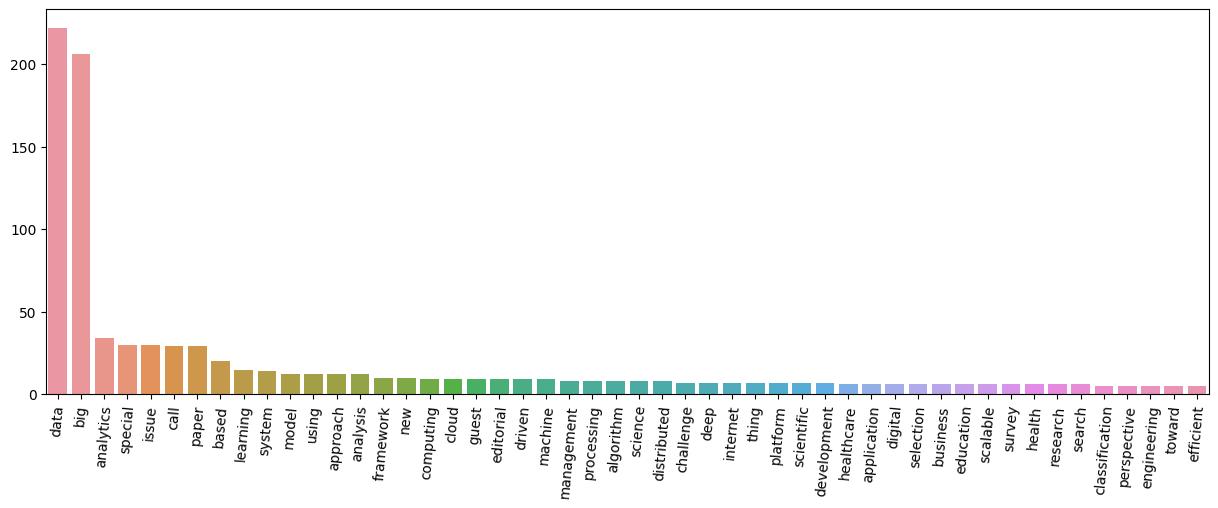

In [63]:
plt.figure(figsize=(15,5))
w_ = list(word_count.keys())
freq_ = list(word_count.values())
sns.barplot(y=freq_, x=w_)
plt.xticks(rotation=85)
plt.show()

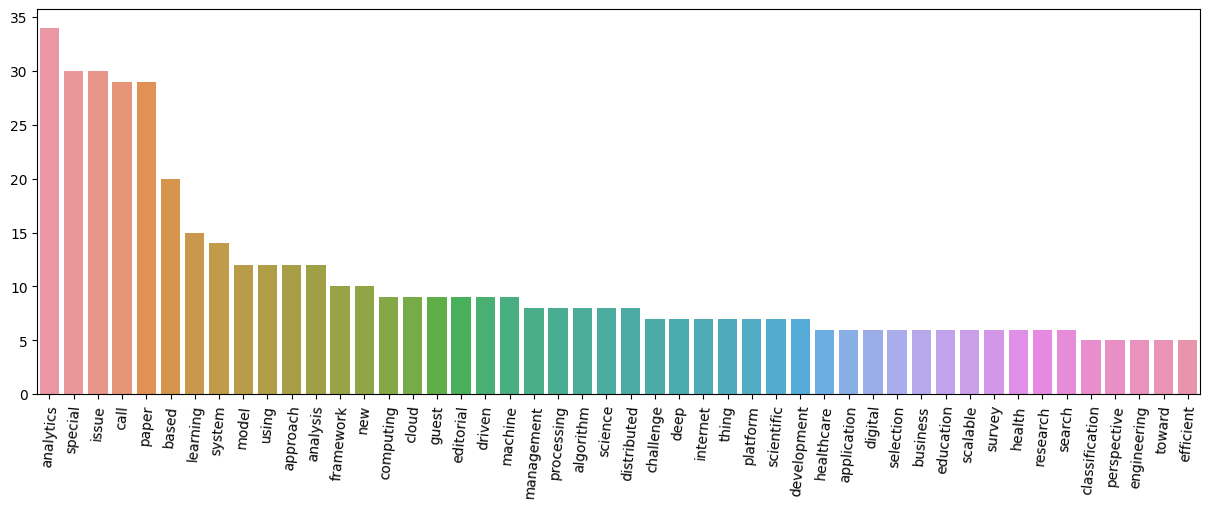

In [68]:
del word_count['data']
del word_count['big']

plt.figure(figsize=(15,5))
w_ = list(word_count.keys())
freq_ = list(word_count.values())
sns.barplot(y=freq_, x=w_)
plt.xticks(rotation=85)
plt.show()

In [ ]:
all_files_data_concat

In [74]:
all_files_data_concat['doc_count'] = 0
summary_year =  all_files_data_concat.groupby('출판일')['doc_count'].count()
summary_year

출판일
2013     1
2014    22
2015    18
2016    25
2017    30
2018    24
2019    12
2020    26
2021    24
2022    18
Name: doc_count, dtype: int64

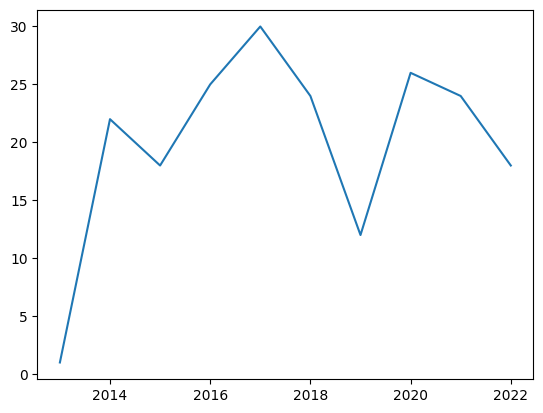

In [77]:
plt.plot(summary_year)
plt.show()

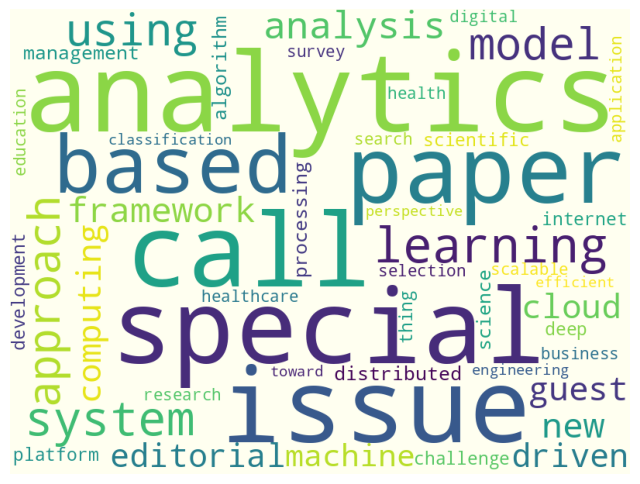

In [79]:
stopwords =  set(STOPWORDS)
wc = WordCloud(background_color='ivory',stopwords=stopwords,width=800,height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()